<a href="https://colab.research.google.com/github/mandananaderi/MLP_Projects_2025/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
fmnist_data = keras.datasets.fashion_mnist

In [33]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

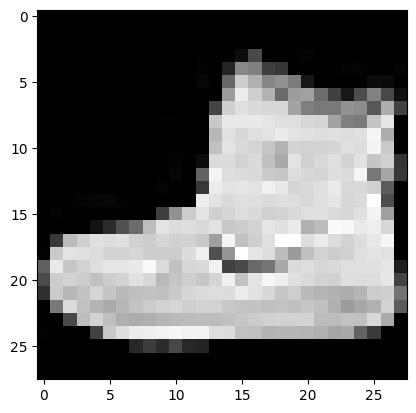

In [35]:
plt.imshow(x_train[0,], cmap='gray')

In [36]:
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0

In [37]:
x_train[1,]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215687, 0.53333336, 0.85882354,
        0.84705883, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.8509804 , 0.84313726, 0.99607843,
        0.90588236, 0.627451  , 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.6901961 , 0.87058824, 0.8784314 , 0.83137256,
        0.79607844, 0.7764706 , 0.76862746, 0.78431374, 0.84313726,
        0.8       , 0.7921

# Fit Model

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [41]:
weights, bias = model.layers[1].get_weights()

In [42]:
weights

array([[ 0.03654971, -0.01733169,  0.04646991, ..., -0.02009512,
        -0.05623738, -0.00419036],
       [ 0.07853515, -0.05868114,  0.04557227, ...,  0.02643621,
         0.04502141,  0.03233715],
       [ 0.07497509,  0.04755531,  0.03623591, ...,  0.05456288,
         0.01532481,  0.07294624],
       ...,
       [ 0.06834738, -0.0244758 , -0.00787312, ...,  0.03660309,
         0.00502466,  0.05189927],
       [ 0.04555821,  0.05591658,  0.06859289, ..., -0.02153403,
         0.07069193, -0.04304434],
       [ 0.0374726 , -0.05522502,  0.04032218, ...,  0.02732083,
         0.0333579 , -0.06275469]], dtype=float32)

In [43]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile

In [44]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model

In [45]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6362 - loss: 1.1138 - val_accuracy: 0.8106 - val_loss: 0.5558
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8196 - loss: 0.5244 - val_accuracy: 0.8187 - val_loss: 0.5046
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8390 - loss: 0.4676 - val_accuracy: 0.8389 - val_loss: 0.4595
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8454 - loss: 0.4395 - val_accuracy: 0.8456 - val_loss: 0.4364
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8547 - loss: 0.4128 - val_accuracy: 0.8514 - val_loss: 0.4214
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8623 - loss: 0.3978 - val_accuracy: 0.8524 - val_loss: 0.4187
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8639 - loss: 0.3867 - val_accuracy: 0.8523 - val_loss: 0.4103
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8652 - loss: 0.3781 - 

In [65]:
history.params


{'verbose': 'auto', 'epochs': 50, 'steps': 1594}

In [64]:
history.history
print(history.history)

{'accuracy': [0.7369803786277771, 0.8232548832893372, 0.8388627171516418, 0.8478431105613708, 0.853509783744812, 0.8595098257064819, 0.8630980253219604, 0.8668627738952637, 0.8705294132232666, 0.8728039264678955, 0.8759607672691345, 0.8774313926696777, 0.881686270236969, 0.8826470375061035, 0.8844313621520996, 0.886980414390564, 0.888372540473938, 0.8900980353355408, 0.8913333415985107, 0.8927058577537537, 0.8939411640167236, 0.8963333368301392, 0.897882342338562, 0.8991372585296631, 0.9009804129600525, 0.9018627405166626, 0.9026078581809998, 0.9044705629348755, 0.9049804210662842, 0.9065490365028381, 0.9074313640594482, 0.9080588221549988, 0.9089019894599915, 0.9112744927406311, 0.9114902019500732, 0.911784291267395, 0.9141568541526794, 0.9144706130027771, 0.9159607887268066, 0.9169411659240723, 0.9170980453491211, 0.9184509515762329, 0.9193333387374878, 0.9198039174079895, 0.9210196137428284, 0.9219803810119629, 0.9228235483169556, 0.9233725666999817, 0.924098014831543, 0.92582350969

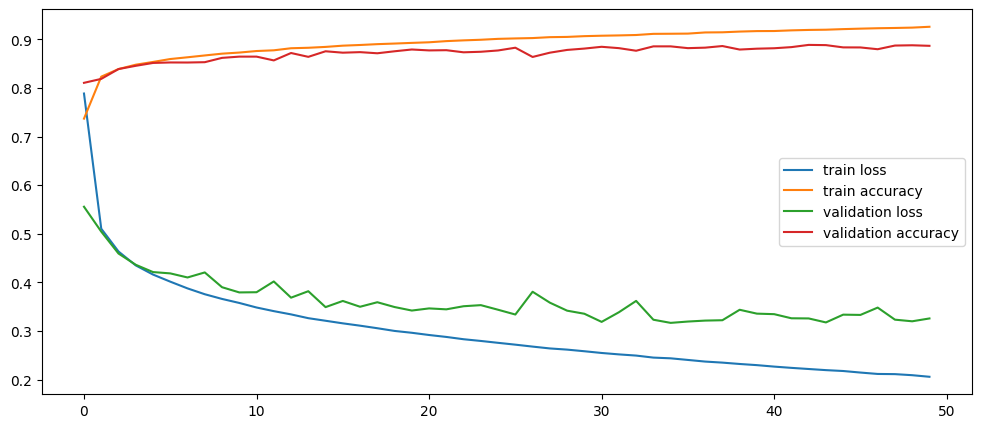

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_loss'], label='validation loss')
ax.plot(history.history['val_accuracy'], label='validation accuracy')
ax.legend()


In [79]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.3454


[0.3477300703525543, 0.876800000667572]

In [67]:
x_3 = x_test[1:3, :]
x_3.shape

(2, 28, 28)

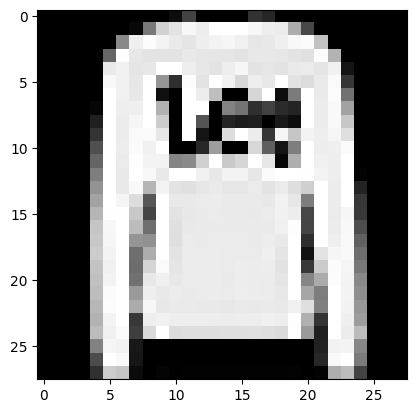

In [74]:
plt.imshow(x_3[0], cmap='gray')

In [72]:
model.predict(x_3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [75]:
model.predict(x_3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(2, 10)

In [76]:
np.argmax(model.predict(x_3).round(3), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([2, 1])

In [77]:
y_test[1:3]

array([2, 1], dtype=uint8)

In [86]:
y_train_pred = model.predict(x_train)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
y_test_pred = model.predict(x_test)

In [87]:
np.argmax(model.predict(x_test).round(3), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])